# Explanatory Analysis
### Effects of borrowers features on Borrowers interest rates and Loan Status

This analysis seek to ask questions from the provided data and discover underlying insights. It would also focus on some featurs that explains interest rates and the loan status

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# setting some seaborn functions for plots
sb.set_style('darkgrid')
sb.set(font_scale=1.3)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# loading wrangled data into dataframe
df_loan = pd.read_csv('df_loan.csv')

## Basic data wrangling 
df_loan.rename(columns={'ListingCategory (numeric)': 'ReasonsForLoan', 
                       'ProsperRating (Alpha)':'ProsperRating'}, inplace=True)


### First Question
- What do people usually get loans for

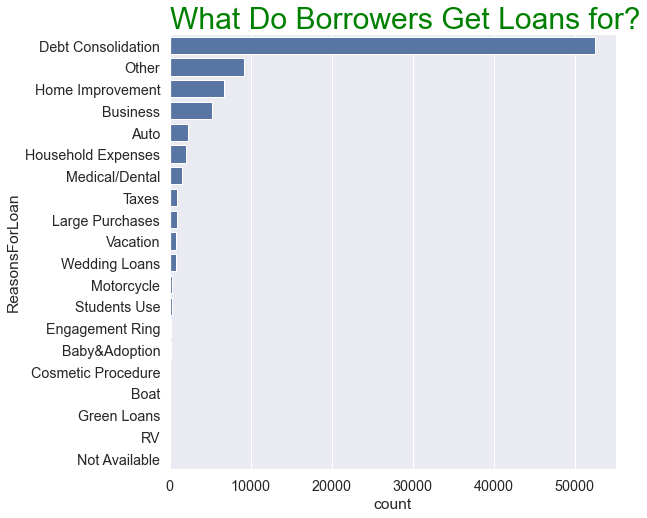

In [2]:
# plotiing 
listing_order = df_loan['ReasonsForLoan'].value_counts().index
default_color = sb.color_palette()[0]
plt.figure(figsize=[8,8])
plot = sb.countplot(data = df_loan, y = 'ReasonsForLoan', color = default_color, order=listing_order)
plt.title('What Do Borrowers Get Loans for?', fontsize=30, fontweight=12,color='green', loc='left');

<p style="color:blue">WOW!!!.</p>

It seems that people acquire loans majorly for debt consolidation. In other words, people get loan to settle loans.
<li>Is this a poor financial practice?</li>
<li>Does this affect their interest Rates?
<li>Does it throw people into more debts</li>

## Interest Rates Vs Reasons for loans

In [3]:
# Reducing reasons for loan
reasons = ['Debt Consolidation', 'Home Improvement', 'Business']
for reason in df_loan['ReasonsForLoan']:
    if reason in reasons:
        continue
    else:
        df_loan['ReasonsForLoan'].replace({reason: 'others'}, inplace=True)
# Reducing laon status
loan_status = ['Completed','Current','Defaulted', 'Chargedoff']
for status in df_loan['LoanStatus']:
    if status in loan_status:
        continue
    else:
        df_loan['LoanStatus'].replace({status:'others'}, inplace=True)

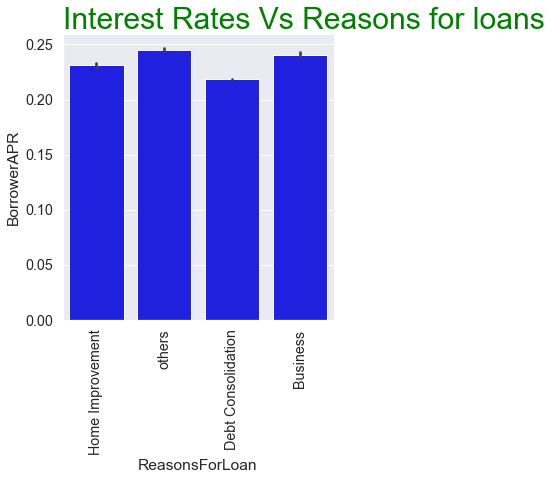

In [4]:
sb.catplot(data=df_loan,kind='bar',x='ReasonsForLoan',y='BorrowerAPR',color='blue')
plt.xticks(rotation = 90);
plt.title('Interest Rates Vs Reasons for loans',fontsize=30, fontweight=12,color='green',
          horizontalalignment='left', loc='left');

It seems lenders dont care what loans are meant for, and this does not affect their interest rates irrespective,

But we see that those who borrow for investments actually get high interest rates

<p> Let's see how income range affects borrowers interest rates!!!</p>

In [5]:
plt.figure(figsize=[8,6])
order = ['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999',
       '$1-24,999', 'Not employed', '$0']

<Figure size 576x432 with 0 Axes>

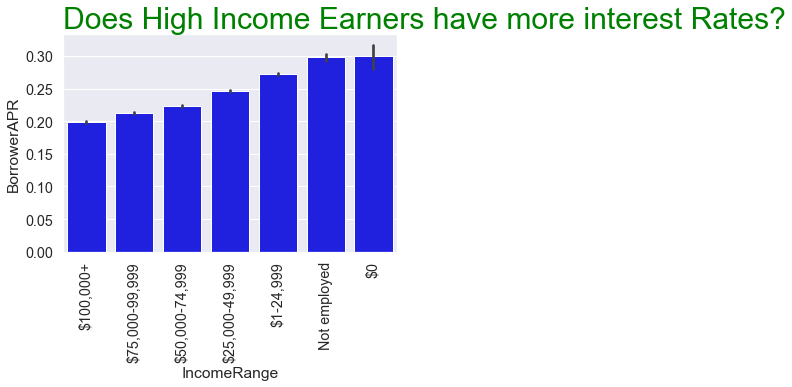

In [6]:
sb.barplot(x='IncomeRange', y='BorrowerAPR', 
    data=df_loan,color='blue', order = order); 
plt.title('Does High Income Earners have more interest Rates?',fontsize=30, 
          fontweight=12,color='green',horizontalalignment='left', loc='left')
plt.xticks(rotation = 90);

We see that high income earners actually have low income rates, what could cause this variance?
<p> We perceive that high income earners should have higher loans, and higher loans should mean higher interest rates accordingly</p>
Lets compare Loan Original Amount with the income earners

In [7]:
plt.figure(figsize=[8,6])
order = ['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999',
       '$1-24,999', 'Not employed', '$0']
clrs = ['orange' if (x =='Not employed' or x =='$0') else 'blue' for x in order]

<Figure size 576x432 with 0 Axes>

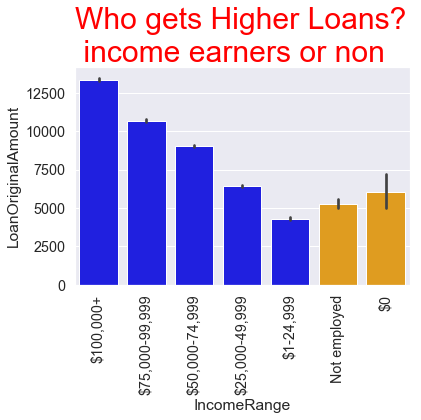

In [8]:
sb.barplot(x='IncomeRange', y='LoanOriginalAmount', data=df_loan, palette=clrs, order = order)
plt.title('Who gets Higher Loans? \n income earners or non',fontsize=30, 
          fontweight=12,color='red',horizontalalignment='left', loc='left')
plt.xticks(rotation = 90);

Could this question the generic principle of fairness?. Why does the rich receive higher loans yet get lesser interest rate percentage?

And the non-employed and no income earners receive low loans yet have high interest rates.

This could be because of lenders feel they are at less risk lending to people with assets (collateral) than people with non.

Speaking of risks, debt to income ratio can be used as a measure of risks

In [9]:
# binning the debt to income ratio 
df_loan = df_loan.assign(dti_cat=pd.cut(df_loan['DebtToIncomeRatio'], 
                               bins=[0, 0.16, 0.24, 10.01], 
                               labels=['Low', 'Medium', 'High']))

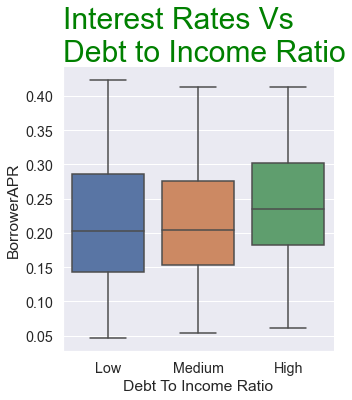

In [10]:
# Plotting a box plot
sb.catplot(x='dti_cat', y='BorrowerAPR', kind='box',data=df_loan)
plt.title('Interest Rates Vs \nDebt to Income Ratio',fontsize=30, 
          fontweight=12,color='green',horizontalalignment='left', loc='left')
plt.xlabel('Debt To Income Ratio');

<b> Lenders seems to give higher interest rates to borrowers with high debt to income ratio. </b>

if high debt to income ratio implies high interest rate,, does this justify unfairness cited earlier?

In [11]:
# creating a column of income earners and non income earners
wanted_income=[]
for income in df_loan['IncomeRange']:
    if income in ['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999']:
        wanted_income.append('INCOME')
    else:
        wanted_income.append('NO INCOME')
df_loan['income_cat'] = wanted_income
    

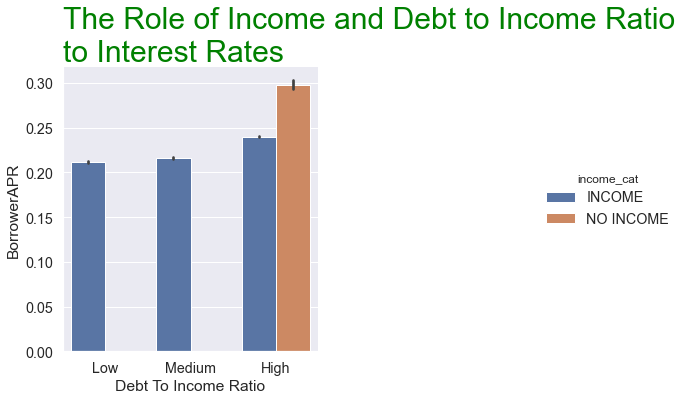

In [12]:
# plottinng a multiple bar chart
sb.catplot(x='dti_cat', y='BorrowerAPR', kind='bar',hue = 'income_cat',data=df_loan)
plt.title('The Role of Income and Debt to Income Ratio\nto Interest Rates',fontsize=30, 
          fontweight=12,color='green',horizontalalignment='left', loc='left')
plt.xlabel('Debt To Income Ratio');

We see that no income earners with high debt to income ratios actually have higher interest rates. 

<b> Generally,  larger loan payments and lower debt to income ratio would imply lower interest rate </b>



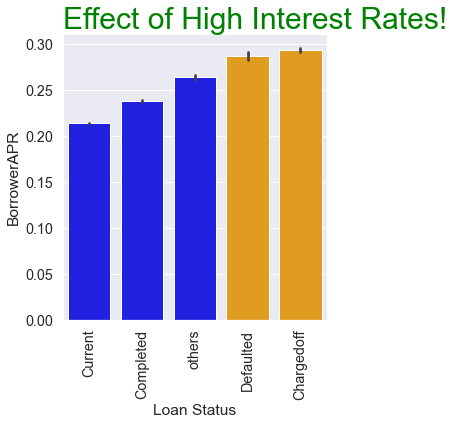

In [13]:
loan_order = ['Current', 'Completed','others', 'Defaulted', 'Chargedoff']
clrs = ['orange' if (x =='Defaulted' or x =='Chargedoff') else 'blue' for x in loan_order]
sb.catplot(x='LoanStatus', y='BorrowerAPR', kind='bar',palette=clrs,order=loan_order,data=df_loan)
plt.title('Effect of High Interest Rates!',fontsize=30, fontweight=12,
          color='green',horizontalalignment='left', loc='left')
plt.xlabel('Loan Status')
plt.xticks(rotation = 90);

<b>We can see that borrowers seems to default when there is high interest rates</b>

## The following plot shows the effectiveness of proper ratings

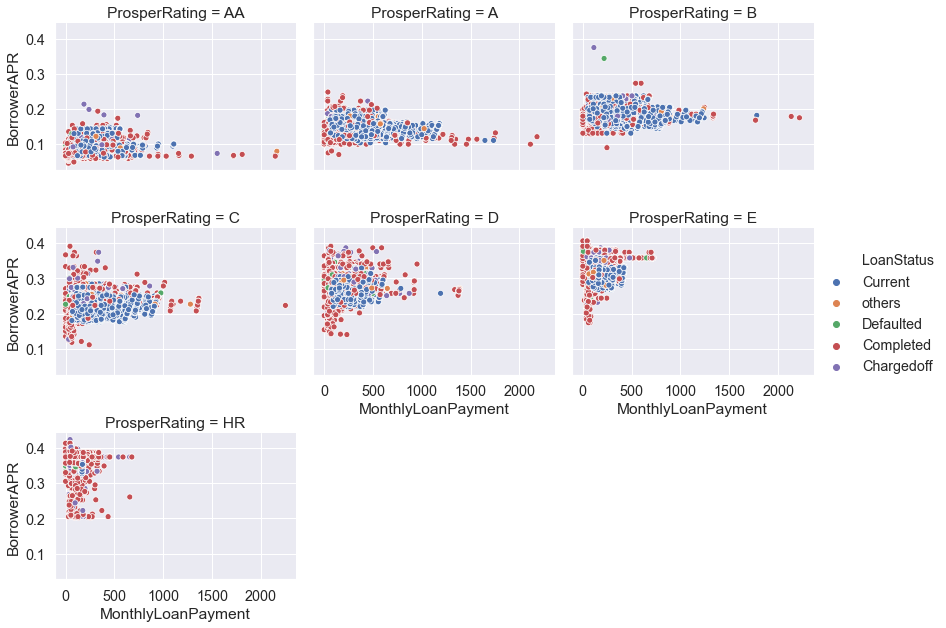

In [14]:
sb.relplot(x='MonthlyLoanPayment', y='BorrowerAPR', data=df_loan, 
           kind='scatter', hue='LoanStatus', col='ProsperRating', 
           col_order = ['AA','A','B','C','D','E','HR'],
          height=3, aspect=1.3,col_wrap=3);

We see the scatter plots gradually moving jigher as prosper ratings move from lowest to highest rankings. 
This shows that interest rates is moving higher as ratings increase.

<p>We also see the blue dots gradually go distinct and red dots gains dominance as rating increases.
The red dots which are legends for completed loans shows that as prosper ratings increases the rate at which loans are completed also tends to increase.</p>

<b>This shows that prosper rating is trustworthy.</b>

# Conclusions

At the end of the project; We observe the following key points

- People majorly borrow for loan settlement
- Higher debt to income ratio implies higher interest rates
- Higher interest rates causes loan defaulting
- Generally, larger loan payment and lower debt to income ratio implies higher interest rates
- Debt to income ratio, loan original amount, income range all have effects on interest rates while reason for loan does not
- Proper rating was found trustworthy
 

# Limitations

>This project is restricted to exploratory analysis as such

- Findings cannot be backed up by measurable statistical tests
- Modeling could not be done in other to predict feature occurences
- Data also had a lot of columns that were a repitition of themselves

In [ ]:
!jupyter nbconvert Explanatory_Analysis.ipynb --to slides --post serve --no-input --no-prompt